In [1]:
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def simulations(pi_1, mu_1, mu_0, dim, sigma_1, sigma_0, N):
    """
   generate similated data points

         X, Y = simulations(pi, mu_1, mu_0, dim, sigma_1, sigma_0, N = 1000)

     Inputs:
             pi_1: prior probability for Y = 1
             mu_1, mu_0:   means for X|Y=1 and X|Y=0
             dim:   dimension of the feature space of X
             sigma_1, sigma_0: standard deviations for X|Y=1 and X|Y=0
             N: number of data points

     Outputs:
            X: data points with features
            y: classification results
    """ 
    # generate y from Bernolli(pi) as a vector with N entries
    y = np.random.binomial(1, pi_1, N)
    X = np.zeros([N, dim]) # initialize X
    num_1 = np.sum(y == 1)
    num_0 = np.sum(y == 0)
    X[Y == 1] = np.random.multivariate_normal(mean = mu_1, cov = sigma_1, size = num_1)
    X[Y == 0] = np.random.multivariate_normal(mean = mu_0, cov = sigma_0, size = num_0)
    return X, y

In [ ]:
mu = 10
dim = 10
# initialization
mu_1 = np.zeros(dim,)
mu_1[0] = mu
mu_0 = np.zeros(dim,)
mu_0[0] = -mu
sigma_1 = np.identity(dim)

In [42]:
# generate data
np.random.seed(0)
dim = 10
pi = np.random.rand()
mu_1 = np.random.rand(dim,)
mu_0 = np.random.rand(dim,)
sigma_1 = np.random.rand(dim, dim)
sigma_0 = np.random.rand(dim, dim)
N = 1000
X, y = simulations(pi, mu_1, mu_0, dim, sigma_1, sigma_0, N)

In [43]:
# class distribution
ratio = y.sum()/len(y)
print('Positive ratio is',ratio)

Positive ratio is 0.569


In [38]:
# import baseline models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE  
from imblearn.pipeline import Pipeline as Pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import (GridSearchCV,StratifiedKFold)

In [44]:
# scale and split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=444, stratify=y)

In [45]:
def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value

    """
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 

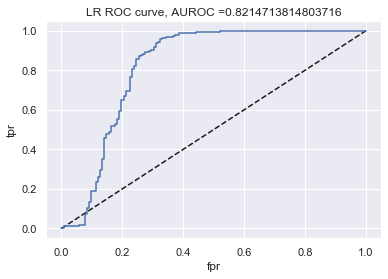

AUROC =  0.8214713814803716


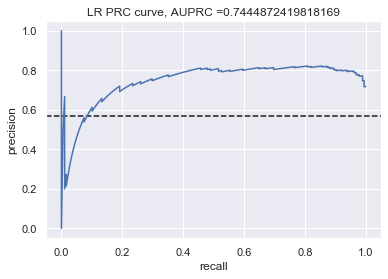

AUPRC =  0.7444872419818169
LR  for train_test split: AUROC =  0.8214713814803716 , AUPRC =  0.7444872419818169 , average precision = , 0.7832246981620342 . 
Best threshold for ROC =  0.6499179238837308 , accuracy for the best ROC threshold is then  0.7696969696969697 , accuracy =  0.8272727272727273 . 
F1 score =  0.85995085995086 , log loss =  5.96589526302072 , recall = 0.9308510638297872 .
------------------------------------------------------------


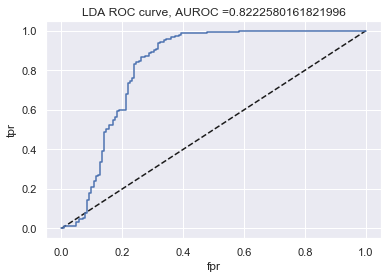

AUROC =  0.8222580161821996


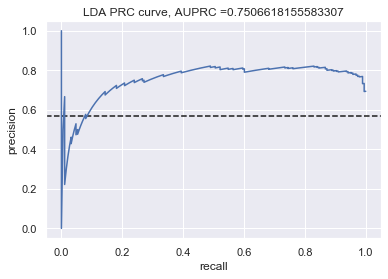

AUPRC =  0.7506618155583307
LDA  for train_test split: AUROC =  0.8222580161821996 , AUPRC =  0.7506618155583307 , average precision = , 0.7747764600088228 . 
Best threshold for ROC =  0.6946753378951114 , accuracy for the best ROC threshold is then  0.7636363636363637 , accuracy =  0.8242424242424242 . 
F1 score =  0.8605769230769231 , log loss =  6.070570336905755 , recall = 0.9521276595744681 .
------------------------------------------------------------


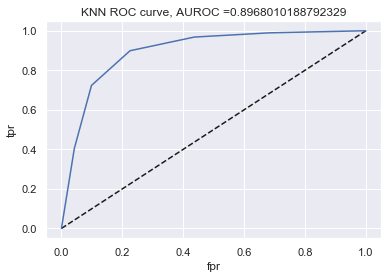

AUROC =  0.8968010188792329


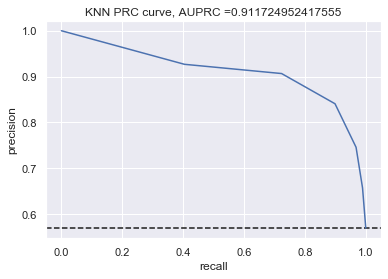

AUPRC =  0.911724952417555
KNN  for train_test split: AUROC =  0.8968010188792329 , AUPRC =  0.911724952417555 , average precision = , 0.8133977116352473 . 
Best threshold for ROC =  0.6 , accuracy for the best ROC threshold is then  0.8 , accuracy =  0.8454545454545455 . 
F1 score =  0.8688946015424164 , log loss =  5.337888434115792 , recall = 0.898936170212766 .
------------------------------------------------------------


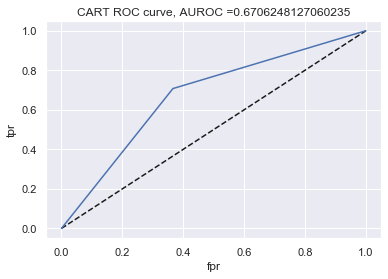

AUROC =  0.6706248127060235


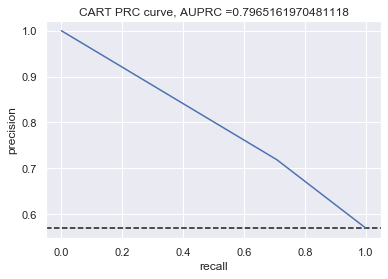

AUPRC =  0.7965161970481118
CART  for train_test split: AUROC =  0.6706248127060235 , AUPRC =  0.7965161970481118 , average precision = , 0.6752635614337742 . 
Best threshold for ROC =  1.0 , accuracy for the best ROC threshold is then  0.4303030303030303 , accuracy =  0.6757575757575758 . 
F1 score =  0.7131367292225201 , log loss =  11.199062585823677 , recall = 0.7074468085106383 .
------------------------------------------------------------


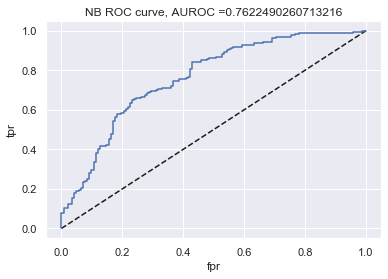

AUROC =  0.7622490260713216


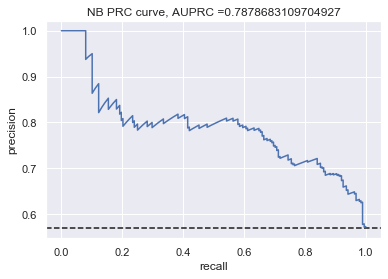

AUPRC =  0.7878683109704927
NB  for train_test split: AUROC =  0.7622490260713216 , AUPRC =  0.7878683109704927 , average precision = , 0.6916321907013396 . 
Best threshold for ROC =  0.5917071785803437 , accuracy for the best ROC threshold is then  0.696969696969697 , accuracy =  0.7151515151515152 . 
F1 score =  0.7673267326732673 , log loss =  9.838465928984382 , recall = 0.824468085106383 .
------------------------------------------------------------


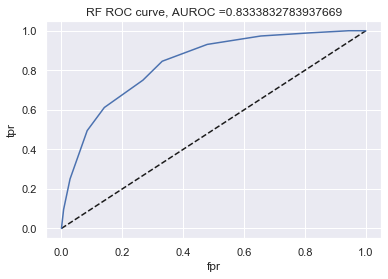

AUROC =  0.8333832783937669


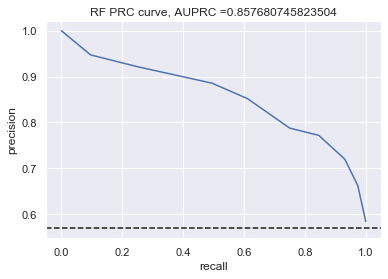

AUPRC =  0.857680745823504
RF  for train_test split: AUROC =  0.8333832783937669 , AUPRC =  0.857680745823504 , average precision = , 0.7332063653292704 . 
Best threshold for ROC =  0.6 , accuracy for the best ROC threshold is then  0.7181818181818181 , accuracy =  0.7424242424242424 . 
F1 score =  0.7683923705722072 , log loss =  8.896443570514409 , recall = 0.75 .
------------------------------------------------------------


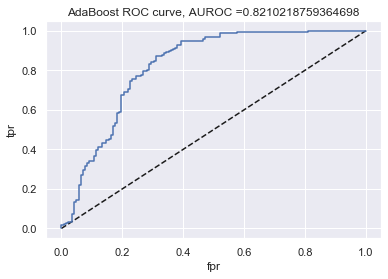

AUROC =  0.8210218759364698


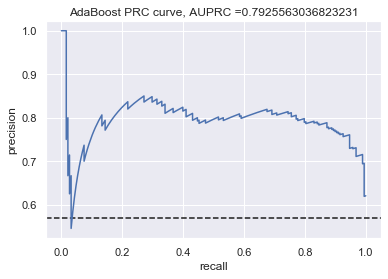

AUPRC =  0.7925563036823231
AdaBoost  for train_test split: AUROC =  0.8210218759364698 , AUPRC =  0.7925563036823231 , average precision = , 0.7515420960959227 . 
Best threshold for ROC =  0.5030398605422732 , accuracy for the best ROC threshold is then  0.7575757575757576 , accuracy =  0.7787878787878788 . 
F1 score =  0.8123393316195372 , log loss =  7.6405001803575106 , recall = 0.8404255319148937 .
------------------------------------------------------------
[[  0.82147138   0.74448724   0.76969697   0.82727273   0.7832247
    0.85995086  -5.96589526   0.93085106]
 [  0.82225802   0.75066182   0.76363636   0.82424242   0.77477646
    0.86057692  -6.07057034   0.95212766]
 [  0.89680102   0.91172495   0.8          0.84545455   0.81339771
    0.8688946   -5.33788843   0.89893617]
 [  0.67062481   0.7965162    0.43030303   0.67575758   0.67526356
    0.71313673 -11.19906259   0.70744681]
 [  0.76224903   0.78786831   0.6969697    0.71515152   0.69163219
    0.76732673  -9.83846593   

In [46]:
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score, log_loss, recall_score, precision_recall_curve, auc
from sklearn.metrics import roc_curve, accuracy_score
seed=7
models = [] # Here I will append all the algorithms that I will use. Each one will run in all the created datasets.
models.append(('LR', LogisticRegression())) 
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
#models.append(('SVM', SVC()))
models.append(('AdaBoost', AdaBoostClassifier()))

#print("evaluation metric: " + scoring)    
results_accuracy=[]
results_auroc=[]
results_average_precision=[]
results_neg_log_loss=[]
results_f1 = []
results_recall =[]
names=[]
measures = ['AUROC','AUPRC','accuracy_best_threshold','accuracy','average_precision','f1','log_loss_score','recall']
scores_table = np.zeros([7,8])
i = 0 # looping index
for name, model in models:
        y_pred_proba = model.fit(X_train, y_train).predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        #Area under ROC curve
        auroc = roc_auc_score(y_test,y_pred_proba)
        plt.plot([0,1],[0,1],'k--')
        plt.plot(fpr,tpr, label=name)
        plt.xlabel('fpr')
        plt.ylabel('tpr')
        title_name = name + ' ROC curve, AUROC ='+str(auroc)
        plt.title(title_name)
        save_name = name + ' simulation ROC curve.png'
        plt.savefig(save_name)
        plt.show()
        print('AUROC = ',auroc)
        precision, recall, thresholds = precision_recall_curve(y_test,y_pred_proba)
        auprc = auc(recall, precision)
        plt.axhline(y=ratio, xmin=0, xmax=1,color='k', linestyle = '--')
        plt.plot(recall,precision, label=name)
        plt.xlabel('recall')
        plt.ylabel('precision')
        title_name = name + ' PRC curve, AUPRC ='+str(auprc)
        plt.title(title_name)
        save_name = name + ' simulation PRC curve.png'
        plt.savefig(save_name)
        plt.show()
        print('AUPRC = ',auprc)
        threshold = Find_Optimal_Cutoff(y_test,y_pred_proba)
        y_pred = y_pred_proba>threshold
        accuracy_best_threshold = accuracy_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, model.predict(X_test))
        average_precision = average_precision_score(y_test, model.predict(X_test))
        f1 = f1_score(y_test, model.predict(X_test))
        log_loss_score = log_loss(y_test, model.predict(X_test))
        recall = recall_score(y_test, model.predict(X_test))
        names.append(name)
        

        # report of scores
        scores_table[i, 0] = auroc
        scores_table[i, 1] = auprc
        scores_table[i, 2] = accuracy_best_threshold
        scores_table[i, 3] = accuracy
        scores_table[i, 4] = average_precision
        scores_table[i, 5] = f1
        scores_table[i, 6] = -log_loss_score
        scores_table[i, 7] = recall
        print(name,' for train_test split: AUROC = ',auroc,', AUPRC = ',auprc,', average precision = ,',average_precision,
              '. \nBest threshold for ROC = ',threshold[0], ', accuracy for the best ROC threshold is then ',accuracy_best_threshold,', accuracy = ', accuracy,
              '. \nF1 score = ', f1, ', log loss = ',log_loss_score,', recall =', recall,'.')
        print ("--"*30)
        i = i + 1
        
print(scores_table)
for i in range(8):
    print('The best model measured by ',measures[i],'is ',names[np.argmax(scores_table[:,i])]) 

np.savetxt("simulations_scores_table1113.csv", scores_table, delimiter=",")